Ep. 5 - Marketing Mix Modeling: How to create a Marketing Forecaster with EXCEL


https://www.youtube.com/watch?v=7HuMsxJU2u4


https://docs.google.com/spreadsheets/d/1FjXCiEI1yXUA825rkt-Hg_9Ry_dcI1YrkmxLYSJBhT0/edit?pli=1&gid=518075327#gid=518075327

# Criando um simulador 

In [58]:
import pandas as pd
# Ler a primeira aba (índice 0)
df = pd.read_excel('../MARKETING MIX MODELING YT.xlsx', sheet_name=0)

df




,Time,sales,FB,TV,Radio,Date
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10


# Adstock(t)= Adstock (t-1)*beta+ Spent(t)

# Dim Ret = Adstock(t) ^Alpha

# Transf. = (adstock(t-1)*beta+spent(t))^alpha

## calcularemos com base no alpha e o beta

In [59]:
calculo_4 = df.copy()

calculo_4['FB_Transf'] =0.0
calculo_4['TV_Transf'] =0.0
calculo_4['Radio_transf'] =0.0

calculo dos coeficientes da linear regressão 

In [60]:
import statsmodels.api as sm
import numpy as np


Alpha= 0.5
Beta = 0.2
Alpha_tv= 0.7 # diminuimos um pouco
Beta_tv = 0.1
Alpha_radio= 0.3  # diminuimos um pouco
Beta_radio = 0.2

calculo_4.loc[0,'TV_Transf'] = calculo_4.loc[0,'TV'] **Alpha_tv
calculo_4.loc[0,'Radio_transf'] = calculo_4.loc[0,'Radio'] **Alpha_radio
calculo_4.loc[0,'FB_Transf'] = calculo_4.loc[0,'FB'] **Alpha


for i in range(len(calculo_4) - 1):  # Adjusted to avoid going out of bounds
    calculo_4.loc[i + 1, 'FB_Transf'] = (calculo_4.loc[i, 'FB_Transf'] * Beta + calculo_4.loc[i + 1, 'FB']) ** Alpha
    calculo_4.loc[i + 1, 'TV_Transf'] = (calculo_4.loc[i, 'TV_Transf'] * Beta_tv + calculo_4.loc[i + 1, 'TV']) ** Alpha_tv
    calculo_4.loc[i + 1, 'Radio_transf'] = (calculo_4.loc[i, 'Radio_transf'] * Beta_radio + calculo_4.loc[i + 1, 'Radio']) ** Alpha_radio

# Definindo a variável dependente e as variáveis independentes
X = calculo_4[['FB_Transf', 'TV_Transf', 'Radio_transf']]  # Variáveis independentes
y = calculo_4['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())
# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")


# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_4 = model.params.to_dict()  # Converte os coeficientes para dicionário
print(coeficientes_4)
# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.5f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.5f}")
print()
display(calculo_4)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     103.6
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.40e-14
Time:                        08:38:15   Log-Likelihood:                -51.639
No. Observations:                  30   AIC:                             111.3
Df Residuals:                      26   BIC:                             116.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8886      1.388     -1.361   

/tmp/ipykernel_7906/511997271.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


,Time,sales,FB,TV,Radio,Date,FB_Transf,TV_Transf,Radio_transf
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,15.169047,12.712889,3.564773
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,6.894477,13.358361,3.149898
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,4.310324,14.859019,3.576012
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,12.343503,13.864700,3.401966
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,13.537677,5.755917,3.399641
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,3.377504,15.348774,3.661797
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,7.627287,11.885429,2.602068
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,11.032926,8.365210,2.113758
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.287337,2.125608,1.111575
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,14.158300,2.062393,2.507610


In [61]:
coeficientes_4

{'const': -1.8885572197429252,
 'FB_Transf': 0.9811948710835838,
 'TV_Transf': 0.7241144786277885,
 'Radio_transf': -0.7398762739920913}

## const = intercept

In [62]:
Alpha_FB= 0.5
Beta_FB = 0.2
Alpha_tv= 0.7 # diminuimos um pouco
Beta_tv = 0.1
Alpha_radio= 0.5  # ALTERAR DE 0.3 PARA 0.5, diminuimos um pouco
Beta_radio = 0.2


In [63]:
calculo_4[0:29]['FB'].mean()

np.float64(139.32758620689657)

In [64]:
calculo_4[0:29]['TV'].mean()

np.float64(24.46896551724138)

In [65]:
calculo_4[0:29]['Radio'].mean()

np.float64(37.5551724137931)

In [66]:
simulador = pd.DataFrame([coeficientes_4])

In [67]:
print(simulador)

      const  FB_Transf  TV_Transf  Radio_transf
0 -1.888557   0.981195   0.724114     -0.739876


In [68]:
simulador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         1 non-null      float64
 1   FB_Transf     1 non-null      float64
 2   TV_Transf     1 non-null      float64
 3   Radio_transf  1 non-null      float64
dtypes: float64(4)
memory usage: 164.0 bytes


In [69]:
simulador['rotulo'] =''

In [70]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,


In [71]:
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1,'FB_Transf'] = calculo_4.loc[29,'FB']
simulador.loc[1,'TV_Transf'] = calculo_4.loc[29,'TV']
simulador.loc[1,'Radio_transf'] = calculo_4.loc[29,'Radio']



In [72]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,
1,NaN,70.600000,16.000000,40.800000,Averages


input é simular o quanto vamos gastar na campanha

In [73]:
simulador.loc[2,'rotulo'] = 'Input'

print('input novos dados para simular')



input novos dados para simular


In [74]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,
1,NaN,70.600000,16.000000,40.800000,Averages
2,NaN,NaN,NaN,NaN,Input


# o input é quanto queremos gastar em cada investiment, FB, TV ou Rádio

In [75]:
simulador.loc[2,'FB_Transf']  = float(input('Entrar com os dados de FB_Transf para simular'))
simulador.loc[2,'TV_Transf']  = float(input('Entrar com os dados de TV_Transf para simular'))
simulador.loc[2,'Radio_transf']  = float(input('Entrar com os dados de Radio_transf para simular'))
   

Entrar com os dados de FB_Transf para simular 160
Entrar com os dados de TV_Transf para simular 100
Entrar com os dados de Radio_transf para simular 150


Entrar com os dados de FB_Transf para simular 160
Entrar com os dados de TV_Transf para simular 100
Entrar com os dados de Radio_transf para simular 150

In [76]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,
1,NaN,70.600000,16.000000,40.800000,Averages
2,NaN,160.000000,100.000000,150.000000,Input


Cáclulo do adstock

In [77]:
simulador.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         1 non-null      float64
 1   FB_Transf     3 non-null      float64
 2   TV_Transf     3 non-null      float64
 3   Radio_transf  3 non-null      float64
 4   rotulo        3 non-null      object 
dtypes: float64(4), object(1)
memory usage: 252.0+ bytes


In [78]:
#??? posição da alpha e beta

simulador.loc[3,'rotulo'] = 'Transformed'


#Adstock(t)= Adstock (t-1)*beta+ Spent(t)
#Transf. = (adstock(t-1)*beta+spent(t))^alpha
# (média*beta+input)^alpha
simulador.loc[3,'FB_Transf']  = (simulador.loc[1,'FB_Transf']*Beta_FB + simulador.loc[2,'FB_Transf'])**Alpha_FB
simulador.loc[3,'TV_Transf']  = (simulador.loc[1,'TV_Transf']*Beta_tv + simulador.loc[2,'TV_Transf'])**Alpha_tv
simulador.loc[3,'Radio_transf']  = (simulador.loc[1,'Radio_transf']*Beta_radio + simulador.loc[2,'Radio_transf'])**Alpha_radio

In [79]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,
1,NaN,70.600000,16.000000,40.800000,Averages
2,NaN,160.000000,100.000000,150.000000,Input
3,NaN,13.195454,25.399525,12.576168,Transformed


In [80]:
simulador.loc[4,'rotulo'] = 'Contribution'

#   coef* Transformed
simulador.loc[4,'FB_Transf']  = (simulador.loc[0,'FB_Transf']* simulador.loc[3,'FB_Transf'])
simulador.loc[4,'TV_Transf']  = (simulador.loc[0,'TV_Transf']*simulador.loc[3,'TV_Transf'])
simulador.loc[4,'Radio_transf']  = (simulador.loc[0,'Radio_transf']* simulador.loc[3,'Radio_transf'])

simulador.loc[4,'const']  = (simulador.loc[0,'const']* 1)


In [81]:
simulador

,const,FB_Transf,TV_Transf,Radio_transf,rotulo
0,-1.888557,0.981195,0.724114,-0.739876,
1,NaN,70.600000,16.000000,40.800000,Averages
2,NaN,160.000000,100.000000,150.000000,Input
3,NaN,13.195454,25.399525,12.576168,Transformed
4,-1.888557,12.947312,18.392164,-9.304808,Contribution


Sales prediction = soma toda a linha do contribuion

In [82]:
total_contribution = simulador.loc[simulador['rotulo'] == 'Contribution'].select_dtypes(include='number').sum(axis=1).values[0]
total_contribution

np.float64(20.146109889852184)

In [83]:
Sales_prediction = total_contribution

print('Sales prediction {}'.format(Sales_prediction))

Sales prediction 20.146109889852184


Cost é a soma dos inputs

In [84]:
Cost = simulador.loc[simulador['rotulo'] == 'Input'].select_dtypes(include='number').sum(axis=1).values[0]
Cost

np.float64(410.0)

In [85]:
print('Custo {}'.format(Cost))

Custo 410.0


CPO = Custo/Venda 

#cac


In [86]:
CPO = Cost/Sales_prediction

print('CPO: {}'.format(CPO))

CPO: 20.35132351812106


resultado em dinheiro

### otimização do investimento

https://blog.superlogica.com/assinaturas/cpl-cpo-cac-conheca-as-metricas-saas-de-aquisicao-de-clientes/

- Custo por Lead (CPL)

<b>Custo por Lead (CPL)</b> é uma métrica que estima quanto a empresa gasta por cada lead (usuário que demonstrou interesse em um conteúdo ou produto e compartilhou suas informações preenchendo um formulário) adquirido.

Veja bem: apenas um pequeno percentual dos leads se torna cliente de fato, então, por melhor que seja a taxa de conversão, o ideal é gerar muitos leads a um custo baixo.

#### CPL = total gasto com a captação dos leads / número de leads captados

Se a empresa gastou R$ 3 mil em marketing digital voltado à captação de leads e atraiu 350 pessoas, a conta fica assim:

#### CPL = 3.000 / 250

CPL = R$ 12

- Custo por Oportunidade (CPO)

Muitos leads podem apenas ter se interessado pelo conteúdo apresentado (em um ebook, por exemplo), mas não no valor que a empresa comercializa.

Quando ele avança no funil de vendas, demonstrando interesse também em um produto ou serviço, torna-se uma oportunidade de venda.

Assim, o <b>Custo por Oportunidade (CPO)</b> estima quanto se gasta, em média, para atrair esse lead qualificado.

- Custo de Aquisição de Clientes (CAC)

Essa métrica vai relacionar os investimentos feitos com o objetivo de atrair novos clientes com o número de pessoas que realmente assinaram um serviço da empresa.

Além de falar em clientes, ou seja, leads que foram convertidos, a diferença em relação à métrica anterior é que entram na conta também as despesas com as vendas.


#### CAC = custos com marketing e vendas / número de novos clientes

Digamos que a empresa gastou R$ 4.500 para atrair 50 clientes novos. A conta fica assim:

#### CAC = 4.500 / 50

CAC = R$ 90

O CAC será sempre maior que o CPL, pois os gastos que entram na conta são maiores, e o número de clientes é menor que o de leads gerados.



#### Ep. 6 - Marketing Mix modeling: How to Minimize Cost Per Order using Excel Solver

https://www.youtube.com/watch?v=GZYPuZf8UC8


https://docs.google.com/spreadsheets/d/1FjXCiEI1yXUA825rkt-Hg_9Ry_dcI1YrkmxLYSJBhT0/edit?pli=1&gid=518075327#gid=518075327

Adstock, efeito que depende do tempo que o investimento na propaganda faz efeito nas vendas. 

solver is an optimize inside. 

optimize the input based on maximizing the output

exemple: minimizing the output

otimizar o investimento


parametri risolutore/parâmetros do solucionador/

## solver parameters


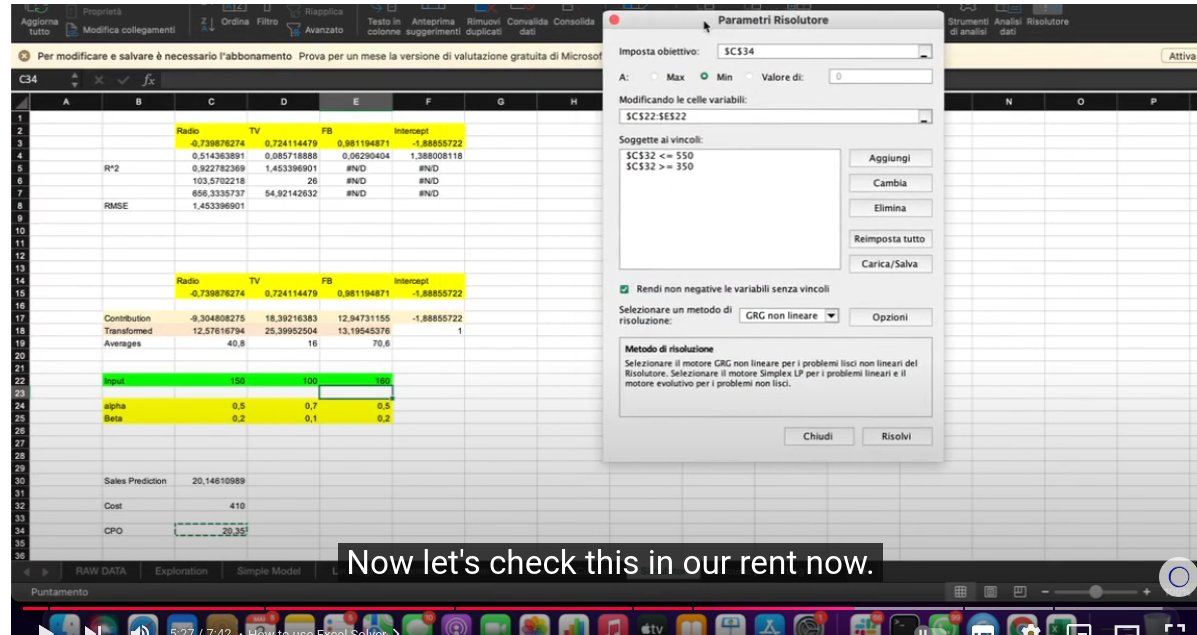

quero calcular o solver parameters no pyuthon com base em 3 input ou investimemnto em tv , radio e facebook, que devem ser alterados. Os solver parameters vais de 550 até 350
usando o algoritimo GRG non lineare

com isso achamos os novos dados de contribution, transformed, sales predictions e CPO

# Base de teste correta

In [87]:
coeficientes_4

{'const': -1.8885572197429252,
 'FB_Transf': 0.9811948710835838,
 'TV_Transf': 0.7241144786277885,
 'Radio_transf': -0.7398762739920913}

In [88]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
simulador = pd.DataFrame([coeficientes_4])

# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 350, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar a diferença do CPO para o alvo)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction
    return abs(cpo - 20.35)  # Minimizar a diferença para o CPO alvo

# Otimização
x0 = [400, 400, 400]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 490.36
Rádio: 353.60
Facebook: 350.12
Custo total: 1194.08
Sales Prediction: 58.68
CPO: 20.35


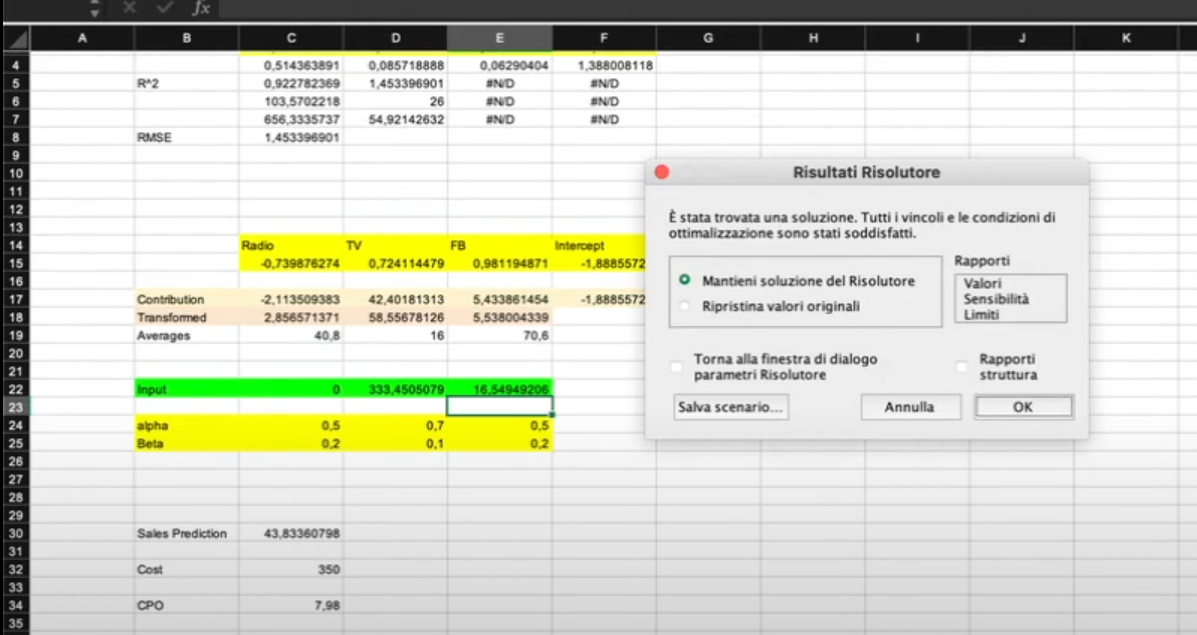

In [89]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
#coeficientes_4 = {
#    'const': -1.8885572197429252,
#    'FB_Transf': 0.9811948710835838,
 #   'TV_Transf': 0.7241144786277885,
#    'Radio_transf': -0.7398762739920913
#}
simulador = pd.DataFrame([coeficientes_4])


# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 350, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar o CPO)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction  # Calcula o CPO
    return cpo  # Minimiza o CPO diretamente

# Otimização
x0 = [400, 400, 400]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 550.00
Rádio: 350.00
Facebook: 350.00
Custo total: 1250.00
Sales Prediction: 63.37
CPO: 19.73


In [90]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
#coeficientes_4 = {
#    'const': -1.8885572197429252,
#    'FB_Transf': 0.9811948710835838,
 #   'TV_Transf': 0.7241144786277885,
#    'Radio_transf': -0.7398762739920913
#}
simulador = pd.DataFrame([coeficientes_4])


# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

# Adiciona as médias dos gastos para a linha "Averages"
simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 350, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar o CPO)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction  # Calcula o CPO
    return cpo  # Minimiza o CPO diretamente

# Otimização
x0 = [400, 400, 400]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 550.00
Rádio: 350.00
Facebook: 350.00
Custo total: 1250.00
Sales Prediction: 63.37
CPO: 19.73


In [92]:

import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
simulador = pd.DataFrame([coeficientes_4])

# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 350, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar a diferença do CPO para o alvo)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction
    return abs(cpo - 5)  # Minimizar a diferença para o CPO alvo

# Otimização
x0 = [400, 400, 400]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 550.00
Rádio: 350.00
Facebook: 350.00
Custo total: 1250.00
Sales Prediction: 63.37
CPO: 19.73


In [93]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
simulador = pd.DataFrame([coeficientes_4])

# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 350, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar a diferença do CPO para o alvo)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction
    return cpo   # Minimizar a diferença para o CPO alvo

# Otimização
x0 = [350, 350, 350]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 550.00
Rádio: 350.00
Facebook: 350.00
Custo total: 1250.00
Sales Prediction: 63.37
CPO: 19.73


In [94]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
simulador = pd.DataFrame([coeficientes_4])

# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
investimento_min, investimento_max = 300, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar a diferença do CPO para o alvo)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction
    return cpo   # Minimizar a diferença para o CPO alvo

# Otimização
x0 = [350, 350, 350]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 550.00
Rádio: 300.00
Facebook: 300.00
Custo total: 1150.00
Sales Prediction: 63.08
CPO: 18.23


In [98]:
import pandas as pd
from scipy.optimize import minimize

# Parâmetros de transformação
Alpha_FB, Beta_FB = 0.5, 0.2
Alpha_tv, Beta_tv = 0.7, 0.1
Alpha_radio, Beta_radio = 0.5, 0.2

# Coeficientes de regressão para os canais de mídia
simulador = pd.DataFrame([coeficientes_4])

# Adiciona as médias dos gastos para a linha "Averages"
simulador['rotulo'] ='' 
simulador.loc[1,'rotulo'] = "Averages"

simulador.loc[1, 'FB_Transf'] = calculo_4[0:29]['FB'].mean()
simulador.loc[1, 'TV_Transf'] = calculo_4[0:29]['TV'].mean()
simulador.loc[1, 'Radio_transf'] = calculo_4[0:29]['Radio'].mean()

# Definindo limites para os investimentos
# mexendo no limite
investimento_min, investimento_max = 20, 550
limites = [(investimento_min, investimento_max)] * 3  # Para TV, Rádio e Facebook

# Função de transformação e contribuição
def calcular_contribuicao(tv, radio, facebook):
    fb_transformed = (simulador.loc[1, 'FB_Transf'] * Beta_FB + facebook) ** Alpha_FB
    tv_transformed = (simulador.loc[1, 'TV_Transf'] * Beta_tv + tv) ** Alpha_tv
    radio_transformed = (simulador.loc[1, 'Radio_transf'] * Beta_radio + radio) ** Alpha_radio

    fb_contrib = coeficientes_4['FB_Transf'] * fb_transformed
    tv_contrib = coeficientes_4['TV_Transf'] * tv_transformed
    radio_contrib = coeficientes_4['Radio_transf'] * radio_transformed
    const_contrib = coeficientes_4['const']

    total_contribution = fb_contrib + tv_contrib + radio_contrib + const_contrib
    return total_contribution

# Função de custo para o solver (minimizar a diferença do CPO para o alvo)
def funcao_objetivo(x):
    tv, radio, facebook = x
    cost = tv + radio + facebook
    sales_prediction = calcular_contribuicao(tv, radio, facebook)
    cpo = cost / sales_prediction
    return cpo   # Minimizar a diferença para o CPO alvo

# Otimização
x0 = [350, 350, 350]  # Valores iniciais de TV, Rádio e Facebook dentro dos limites
resultado = minimize(funcao_objetivo, x0, method='SLSQP', bounds=limites)

# Exibir o resultado
if resultado.success:
    tv_opt, radio_opt, fb_opt = resultado.x
    cost_opt = tv_opt + radio_opt + fb_opt
    sales_prediction_opt = calcular_contribuicao(tv_opt, radio_opt, fb_opt)
    cpo_opt = cost_opt / sales_prediction_opt

    print("Investimentos ótimos encontrados:")
    print(f"TV: {tv_opt:.2f}")
    print(f"Rádio: {radio_opt:.2f}")
    print(f"Facebook: {fb_opt:.2f}")
    print(f"Custo total: {cost_opt:.2f}")
    print(f"Sales Prediction: {sales_prediction_opt:.2f}")
    print(f"CPO: {cpo_opt:.2f}")
else:
    print("A otimização falhou:", resultado.message)

Investimentos ótimos encontrados:
TV: 68.34
Rádio: 20.00
Facebook: 20.00
Custo total: 108.34
Sales Prediction: 15.30
CPO: 7.08


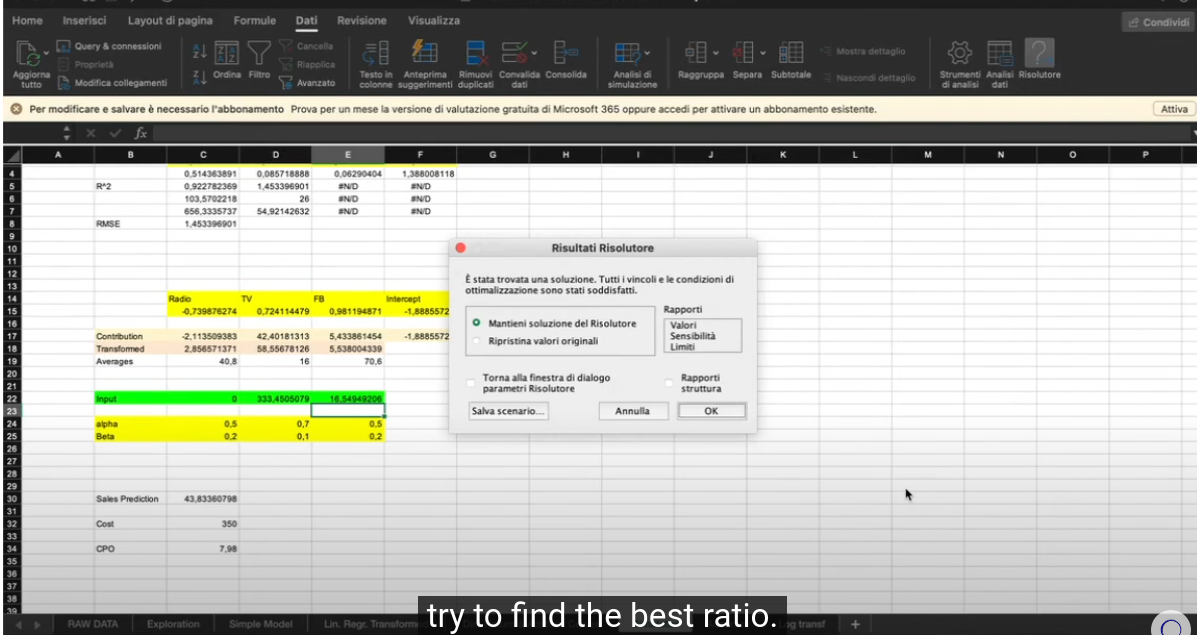

# mexendo no limite de investimento conseguimos chegar em um CPO semelhante ao exemplo do EXCEL, e indicando que na tv se deve investir mais